# QR Decomposition

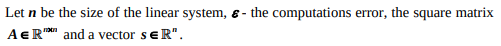

***
### 1. Compute the following vector b: 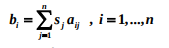
***

***
#### Python implementation
***

In [3]:
def calculate_b(A, s):
    n, _ = A.shape
    b = []
    for i in range(n):
        element = 0
        for j in range(n):
            element += s[j] * A[i][j]
        b.append(element)
    return b

In [16]:
import numpy as np

n = 3
eps = 10 ** -16
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 10]
])
A = A.astype('float64')
s = np.array([1, 2, 3])

n, eps, A, s = init_values()

if A.shape[0] != s.shape[0] != n:
    print("Invalid measurements")
    raise Exception

b = calculate_b(A, s)
print("B = ", b)

B =  [-94.35869494039582, 154.23993458816213, 123.23641156468435, -107.08387755430006, -265.24791595531644, -411.99158905886776, 201.33264355427215, 147.83078599956542, -74.75606346488243, 241.33042578048835, 412.92710994797926, -471.43141225143233, 175.64427712275833, 88.70703791419513, -99.15345048283079, 193.47523876734962, -193.28784973264825, 152.81856884603545, 28.11671878371278, 261.32743831442485, 149.6492510331909, -104.49397164330037, -86.38555132025496, 667.3383944717677, 106.03545104932307, 288.53183480735487, 402.17201695735014, 49.87058983669223, -15.879194864549639, -212.05702348277464, -399.39556564553595, -552.6272970030739, -123.1133099597751, 214.60000729925653, -155.6126863273346, -313.5079363652341, 122.3385668726164, 113.24917974332566, 37.459877329789016, 11.039732264789816, 207.66447100826426, 147.62921737272424, -317.4936414855787, -72.6733163524023, -318.5350585428018, 40.26602471564155, -214.0843322687745, 277.57742000924225, -170.9643769822307, -214.07492278

***
### 2. Implement the QR decomposition for matrix A using Householder’s algorithm
***

In [6]:
def qr_householder(A):
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)
    for k in range(n):
        # Compute the Householder reflection vector
        x = R[k:, k]
        e = np.zeros_like(x)
        e[0] = np.sign(x[0])
        v = np.linalg.norm(x) * e + x
        v = v / np.linalg.norm(v)

        # Apply the Householder reflection to R
        R[k:, :] -= 2 * np.outer(v, v.T @ R[k:, :])

        # Apply the Householder reflection to Q
        Q[:, k:] -= 2 * Q[:, k:] @ np.outer(v, v.T)

    return Q, R

In [17]:
Q, R = qr_householder(A)
Q_real, R_real = np.linalg.qr(A)
print("Q:\n", Q)
print("Q Real:\n", Q_real)
print("R:\n", R)
print("R Real:\n", R_real)

Q:
 [[-0.20514501  0.20010802  0.01271144 ... -0.1068862   0.17577727
  -0.05871781]
 [ 0.16567469 -0.21315769 -0.17249851 ... -0.00900153 -0.06591357
   0.25345411]
 [ 0.17834934 -0.06654916 -0.15184779 ... -0.05144563  0.08158412
  -0.04597438]
 ...
 [ 0.08252593  0.19898419  0.2067884  ... -0.17899854  0.25275067
   0.03029199]
 [ 0.20687702  0.11901751  0.03385764 ... -0.02800926  0.2100374
   0.08051411]
 [-0.05317767 -0.01528537  0.02532551 ... -0.06496401 -0.0318175
  -0.00149561]]
Q Real:
 [[-0.20514501  0.20010802  0.01271144 ... -0.1068862   0.17577727
   0.05871781]
 [ 0.16567469 -0.21315769 -0.17249851 ... -0.00900153 -0.06591357
  -0.25345411]
 [ 0.17834934 -0.06654916 -0.15184779 ... -0.05144563  0.08158412
   0.04597438]
 ...
 [ 0.08252593  0.19898419  0.2067884  ... -0.17899854  0.25275067
  -0.03029199]
 [ 0.20687702  0.11901751  0.03385764 ... -0.02800926  0.2100374
  -0.08051411]
 [-0.05317767 -0.01528537  0.02532551 ... -0.06496401 -0.0318175
   0.00149561]]
R:
 [[ 

***
### 3. Solve the linear system Ax = b using the QR decomposition
***

In [8]:
def solve_qr(Q, R, b):
    y = Q.T @ b
    x = np.linalg.solve(R, y)
    return x

In [9]:
x_householder = solve_qr(Q, R, b)

print("\nX_HOUSEHOLDER:", x_householder)


X_HOUSEHOLDER: [1. 2. 3.]


#### 3.2 Compute and display: 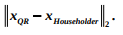

- `Xqr` is using the QR decomposition implemented in numpy
- `xHouseholder` is the QR decomposition computed at item 2

In [18]:
x_householder = solve_qr(Q, R, b)
x_qr = solve_qr(Q_real, R_real, b)
print("X_HOUSEHOLDER:", x_householder)
print("X-qr", x_qr)
print("Norm: ", np.linalg.norm(x_householder - x_qr))

X_HOUSEHOLDER: [ 5.99898151e+00  5.98704894e+00 -7.66457327e+00 -6.78011930e+00
  9.11751913e+00 -5.02871770e-01 -4.06323945e+00 -2.79463295e+00
 -7.48828086e+00  2.87989577e+00  7.77118705e+00 -2.00720408e+00
  3.02153744e+00  4.25426206e+00  4.04219488e-01  6.68298718e+00
  2.89115058e-03 -5.06332264e+00 -3.44357893e+00  4.94728742e+00
 -4.14392630e+00  2.43832312e+00  5.96483843e+00 -8.43167608e+00
  1.98459674e+00 -8.71689339e+00 -8.92636468e+00  9.88946493e+00
 -8.07169927e+00  7.45497877e+00  9.20889265e+00 -5.34475142e+00
 -6.51526843e+00  4.03825386e+00 -6.11265699e+00 -1.27792895e+00
  1.36308496e-01 -4.32280920e+00 -5.18436305e+00  2.32377824e+00
  4.87082753e+00  7.49132863e+00 -4.25545164e+00 -4.26464667e+00
  5.22548798e+00 -1.24821636e+00 -9.65756692e+00 -6.62806230e+00
 -8.07219962e+00  1.00014559e+00 -5.84030966e+00  1.28499271e+00
  7.20780146e-01  1.11481121e+00  7.01824928e+00  8.38296830e-01
  4.06290947e+00 -7.37877070e+00 -5.78439746e+00  3.34757813e+00
 -3.412953

***
### 4. Compute and display the following errors
***

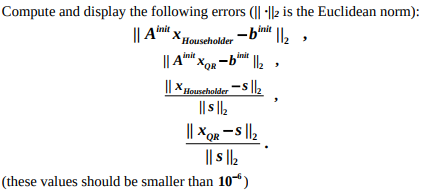

In [11]:
print("\n\nA*x_householder - b = ", np.linalg.norm(np.dot(A, x_householder) - b))
print("A*x_qr - b = ", np.linalg.norm(np.dot(A, x_householder) - b))
print("x_householder -s / s = ", np.linalg.norm(x_householder - s) / np.linalg.norm(s))
print("x_qr - s / s = ", np.linalg.norm(x_qr - s) / np.linalg.norm(s))



A*x_householder - b =  3.552713678800501e-15
A*x_qr - b =  3.552713678800501e-15
x_householder -s / s =  6.713997766802522e-16
x_qr - s / s =  2.6514514068169923e-15


***
### 5. Compute the inverse matrix of matrix A using the QR decomposition computed at item 2.
***

In [12]:
def inverse_qr(A):
    Q, R = np.linalg.qr(A)
    n = A.shape[0]
    A_inv = np.zeros((n, n))
    for i in range(n):
        e = np.zeros(n)
        e[i] = 1
        y = Q.T @ e
        x = np.linalg.solve(R, y)
        A_inv[:, i] = x
    return A_inv

In [13]:
A_householder = inverse_qr(A)

print("A_householder:\n", A_householder)

A_householder:
 [[-0.66666667 -1.33333333  1.        ]
 [-0.66666667  3.66666667 -2.        ]
 [ 1.         -2.          1.        ]]


#### 5.2 Compare it with inverse matrix computed using the corresponding function from the library. Display the norm: 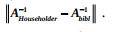


In [14]:
A_library = np.linalg.inv(A)
print("\n\nA**-1 householder - A library = ", np.linalg.norm(A_householder - A_library))



A**-1 householder - A library =  7.727024638495423e-15


***
### 6. Write your program with the possibility of random initialization of the input data 
(thus your program can run for any value of n).
***

In [15]:
def init_values():
    n = int(np.random.uniform(3, 100))
    eps = 10 ** -16
    A = np.random.uniform(-10, 10, size=(n, n))

    while np.linalg.det(A) == 0:
        A = np.random.uniform(-10, 10, size=(n, n))
    s = np.random.uniform(-10, 10, size=n)
    return n, eps, A, s
